In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Facebook_metrics_Clustering.csv')

In [5]:
df

,post_type,category,post_month,post_weekday,post_hour,paid,total_interactions,post_ratio_engaged_consumers,post_ratio_imp_reach_log,post_ratio_imp_reach_like_log,post_ratio_engaged_consumption_log
0,Photo,2,12,4,3,0.0,100,1.633028,1.047293,1.056689,0.848498
1,Status,2,12,3,10,0.0,164,1.070536,1.037408,1.070180,0.920614
2,Photo,3,12,3,3,0.0,80,1.566372,1.033991,1.054634,0.773190
3,Photo,2,12,2,10,1.0,1777,2.798734,1.013536,1.066171,0.591867
4,Photo,2,12,2,3,0.0,393,1.636585,1.056605,1.080533,0.902048
...,...,...,...,...,...,...,...,...,...,...,...
491,Photo,3,1,7,2,0.0,84,1.035311,0.958922,0.975163,1.256401
492,Photo,2,1,5,8,0.0,75,1.057087,1.026021,1.058694,1.188572
493,Photo,1,1,5,2,0.0,115,1.092657,1.068155,1.093855,1.160047
494,Photo,3,1,4,11,0.0,136,1.090592,1.036744,1.047004,1.178239


#### PreProcessing Data
1. `Total_interactions` I have to handle outliers in it by applying `log` or `Sqrt` Scale
2. Split Data So `Encoding` dont result a `DataLeakge` to Our Model
3. Post_Type & Category Will be converted into `LabelEncoder`
4. `Post_month`, `post_weekday`, `post_hour` all of them i will converte them into `OneHotEncoding`

In [7]:
df.describe()

,category,post_month,post_weekday,post_hour,paid,total_interactions,post_ratio_engaged_consumers,post_ratio_imp_reach_log,post_ratio_imp_reach_like_log,post_ratio_engaged_consumption_log
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,1.883065,7.086694,4.143145,7.832661,0.278226,211.606855,1.187947,1.037933,1.065713,1.105461
std,0.851876,3.276261,2.034469,4.378347,0.448578,381.252265,0.228230,0.163646,0.171456,0.363115
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.775999,0.861094,0.476016
25%,1.000000,4.000000,2.000000,3.000000,0.000000,71.000000,1.048937,0.980253,1.002351,0.910202
50%,2.000000,7.000000,4.000000,9.000000,0.000000,122.500000,1.104070,1.015905,1.035430,1.029461
75%,3.000000,10.000000,6.000000,11.000000,1.000000,228.500000,1.228392,1.056337,1.080672,1.182131
max,3.000000,12.000000,7.000000,23.000000,1.000000,6334.000000,2.798734,3.151465,3.174056,3.553239


In [8]:
df['total_interactions'] = np.log1p(df['total_interactions'])

In [9]:
df.describe()

,category,post_month,post_weekday,post_hour,paid,total_interactions,post_ratio_engaged_consumers,post_ratio_imp_reach_log,post_ratio_imp_reach_like_log,post_ratio_engaged_consumption_log
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,1.883065,7.086694,4.143145,7.832661,0.278226,4.744390,1.187947,1.037933,1.065713,1.105461
std,0.851876,3.276261,2.034469,4.378347,0.448578,1.205952,0.228230,0.163646,0.171456,0.363115
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.775999,0.861094,0.476016
25%,1.000000,4.000000,2.000000,3.000000,0.000000,4.276666,1.048937,0.980253,1.002351,0.910202
50%,2.000000,7.000000,4.000000,9.000000,0.000000,4.816233,1.104070,1.015905,1.035430,1.029461
75%,3.000000,10.000000,6.000000,11.000000,1.000000,5.435896,1.228392,1.056337,1.080672,1.182131
max,3.000000,12.000000,7.000000,23.000000,1.000000,8.753845,2.798734,3.151465,3.174056,3.553239


#### Converting Total Interaction to logarithm
1. in `total_interactions` mean `212.120000` while std `380.233118` std > mean it will indicate a `High-Variance`
2. With A high-Variance or high `std` model will get confused and for Sure Error Will be huge esspicially in `r2`
3. Before Doing the `log` as we see `75%` was `228.5` and Max was `63334` which means it's `28x` from the max
4. After Doing the `log` as we see `75%` is `5.4` and Max is `8.75` but now it's `1.6x` more But the Order of them will stay the Same But we just Dicreased Effection of Highest Number



#### Train_Test_Split

In [84]:
X = df_encoded.drop('total_interactions',axis=1)
y = df_encoded['total_interactions']

In [85]:
X

,paid,post_ratio_engaged_consumers,post_ratio_imp_reach_log,post_ratio_imp_reach_like_log,post_ratio_engaged_consumption_log,category_2,category_3,post_type_Photo,post_type_Status,post_type_Video,...,post_hour_19,post_hour_20,post_hour_22,post_hour_23,post_weekday_2,post_weekday_3,post_weekday_4,post_weekday_5,post_weekday_6,post_weekday_7
0,0.0,1.633028,1.047293,1.056689,0.848498,True,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
1,0.0,1.070536,1.037408,1.070180,0.920614,True,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
2,0.0,1.566372,1.033991,1.054634,0.773190,False,True,True,False,False,...,False,False,False,False,False,True,False,False,False,False
3,1.0,2.798734,1.013536,1.066171,0.591867,True,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
4,0.0,1.636585,1.056605,1.080533,0.902048,True,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,0.0,1.035311,0.958922,0.975163,1.256401,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,True
492,0.0,1.057087,1.026021,1.058694,1.188572,True,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
493,0.0,1.092657,1.068155,1.093855,1.160047,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
494,0.0,1.090592,1.036744,1.047004,1.178239,False,True,True,False,False,...,False,False,False,False,False,False,True,False,False,False


In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [87]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((396, 48), (100, 48), (396,), (100,))

#### Encoding
1. I will use `LabelEncoding` For `Post_type` And `Category` Since i will Use `Non-Linear` Model
2. But in Case we Want to Use `Linear Model` `OneHostEncoding` Is better for them

In [82]:
cols_to_encode = [
    'category',
    'post_type',
    'post_month',
    'post_hour',
    'post_weekday'
]

df_encoded = pd.get_dummies(
    df,
    columns=cols_to_encode,
    drop_first=True   # set True if you want to avoid dummy trap
)

In [73]:
# from sklearn.preprocessing import LabelEncoder,OneHotEncoder
# le_cat = LabelEncoder()
# le_post = LabelEncoder()

# X_train['category'] = le_cat.fit_transform(X_train['category'])
# X_train['post_type'] = le_post.fit_transform(X_train['post_type'])

# X_test['category'] = le_cat.transform(X_test['category'])
# X_test['post_type'] = le_post.transform(X_test['post_type'])

In [83]:
df_encoded

,paid,total_interactions,post_ratio_engaged_consumers,post_ratio_imp_reach_log,post_ratio_imp_reach_like_log,post_ratio_engaged_consumption_log,category_2,category_3,post_type_Photo,post_type_Status,...,post_hour_19,post_hour_20,post_hour_22,post_hour_23,post_weekday_2,post_weekday_3,post_weekday_4,post_weekday_5,post_weekday_6,post_weekday_7
0,0.0,4.615121,1.633028,1.047293,1.056689,0.848498,True,False,True,False,...,False,False,False,False,False,False,True,False,False,False
1,0.0,5.105945,1.070536,1.037408,1.070180,0.920614,True,False,False,True,...,False,False,False,False,False,True,False,False,False,False
2,0.0,4.394449,1.566372,1.033991,1.054634,0.773190,False,True,True,False,...,False,False,False,False,False,True,False,False,False,False
3,1.0,7.483244,2.798734,1.013536,1.066171,0.591867,True,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,0.0,5.976351,1.636585,1.056605,1.080533,0.902048,True,False,True,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,0.0,4.442651,1.035311,0.958922,0.975163,1.256401,False,True,True,False,...,False,False,False,False,False,False,False,False,False,True
492,0.0,4.330733,1.057087,1.026021,1.058694,1.188572,True,False,True,False,...,False,False,False,False,False,False,False,True,False,False
493,0.0,4.753590,1.092657,1.068155,1.093855,1.160047,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
494,0.0,4.919981,1.090592,1.036744,1.047004,1.178239,False,True,True,False,...,False,False,False,False,False,False,True,False,False,False


In [74]:
X_train.category,X_test.category

(56     0
 227    0
 391    1
 329    2
 220    1
       ..
 106    2
 270    1
 348    2
 435    0
 102    2
 Name: category, Length: 396, dtype: int64,
 457    0
 73     0
 231    2
 175    1
 237    1
       ..
 247    1
 382    0
 19     2
 320    0
 483    2
 Name: category, Length: 100, dtype: int64)

#### Fitting Model

In [75]:
df.head()

,post_type,category,post_month,post_weekday,post_hour,paid,total_interactions,post_ratio_engaged_consumers,post_ratio_imp_reach_log,post_ratio_imp_reach_like_log,post_ratio_engaged_consumption_log
0,Photo,2,12,4,3,0.0,4.615121,1.633028,1.047293,1.056689,0.848498
1,Status,2,12,3,10,0.0,5.105945,1.070536,1.037408,1.070180,0.920614
2,Photo,3,12,3,3,0.0,4.394449,1.566372,1.033991,1.054634,0.773190
3,Photo,2,12,2,10,1.0,7.483244,2.798734,1.013536,1.066171,0.591867
4,Photo,2,12,2,3,0.0,5.976351,1.636585,1.056605,1.080533,0.902048


In [88]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [89]:
rf = RandomForestRegressor(n_estimators=500,random_state=42)

In [90]:
rf.fit(X_train,y_train)

,n_estimators,500
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [91]:
rf.score(X_test,y_test)

0.751867865392819

In [92]:
cr = cross_val_score(estimator=rf,X = X_train,y=y_train,cv=5)

In [93]:
cr

array([0.62281402, 0.73159976, 0.82049249, 0.76336176, 0.61863301])

In [94]:
np.mean(cr)

np.float64(0.7113802098485216)

In [95]:
pd.DataFrame(rf.feature_importances_,index=X_train.columns)

,0
paid,0.004490
post_ratio_engaged_consumers,0.614589
post_ratio_imp_reach_log,0.037368
post_ratio_imp_reach_like_log,0.036149
post_ratio_engaged_consumption_log,0.130139
category_2,0.010569
category_3,0.003371
post_type_Photo,0.017512
post_type_Status,0.026889
post_type_Video,0.002311


In [62]:
df

,post_type,category,post_month,post_weekday,post_hour,paid,total_interactions,post_ratio_engaged_consumers,post_ratio_imp_reach_log,post_ratio_imp_reach_like_log,post_ratio_engaged_consumption_log
0,Photo,2,12,4,3,0.0,4.615121,1.633028,1.047293,1.056689,0.848498
1,Status,2,12,3,10,0.0,5.105945,1.070536,1.037408,1.070180,0.920614
2,Photo,3,12,3,3,0.0,4.394449,1.566372,1.033991,1.054634,0.773190
3,Photo,2,12,2,10,1.0,7.483244,2.798734,1.013536,1.066171,0.591867
4,Photo,2,12,2,3,0.0,5.976351,1.636585,1.056605,1.080533,0.902048
...,...,...,...,...,...,...,...,...,...,...,...
491,Photo,3,1,7,2,0.0,4.442651,1.035311,0.958922,0.975163,1.256401
492,Photo,2,1,5,8,0.0,4.330733,1.057087,1.026021,1.058694,1.188572
493,Photo,1,1,5,2,0.0,4.753590,1.092657,1.068155,1.093855,1.160047
494,Photo,3,1,4,11,0.0,4.919981,1.090592,1.036744,1.047004,1.178239


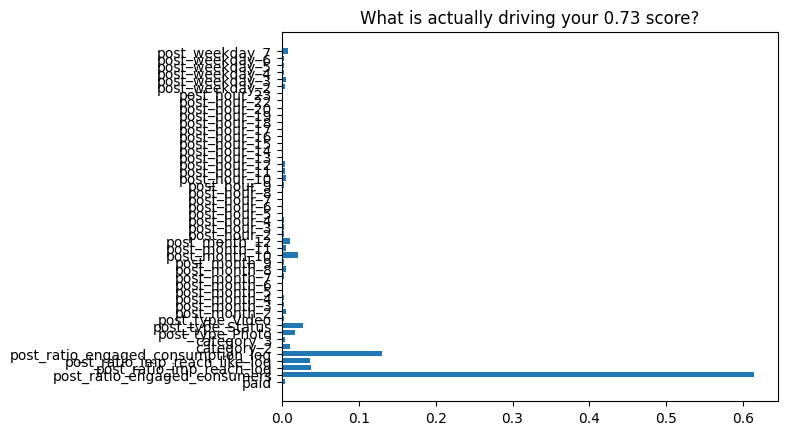

In [96]:
import matplotlib.pyplot as plt

# Assuming your model is named 'model'
importances = rf.feature_importances_
feat_names = X_train.columns
plt.barh(feat_names, importances)
plt.title("What is actually driving your 0.73 score?")
plt.show()